<a href="https://colab.research.google.com/github/mustaidahmed/ai-image-generator/blob/main/ai_image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade diffusers transformers accelerate torch bitsandbytes scipy safetensors xformers torchvision

In [2]:
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade diffusers transformers accelerate bitsandbytes scipy safetensors xformers

Looking in indexes: https://download.pytorch.org/whl/cu118


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

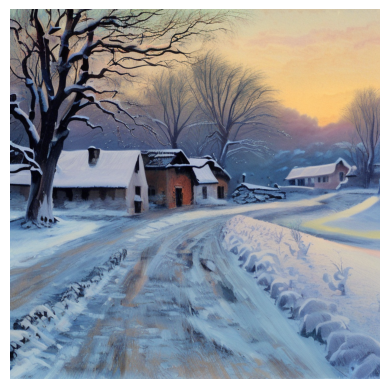

In [3]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import matplotlib.pyplot as plt

torch.cuda.empty_cache()
model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "winter morning in a village"

# Generate the image and store it in the 'image' variable
image = pipe(prompt, guidance_scale=7.5).images[0]

plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
!pip install gradio

import gradio as gr

# Define the image generation function
def generate_image(prompt):
    image = pipe(prompt, guidance_scale=7.5).images[0]
    return image

# Create Gradio interface
interface = gr.Interface(
    fn=generate_image,
    inputs=gr.Textbox(label="Enter your prompt"),
    outputs=gr.Image(),
    title="AI- Image Generator 🤖🧠🇦🇮👾",
    description="Generate images with Stable Diffusion 2.1 in Google Colab"
)

# Launch Gradio app
interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://edfa0ab587276a7f49.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
